In [ ]:
"""
Probability Distributions & Linear Regression: A Practical Deep Dive
=====================================================================

This explores the 20% of distribution theory that drives 80% of linear regression understanding.

Domain: Microservices - Predicting server response times based on queue depth
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import normaltest, shapiro
import pandas as pd
import seaborn as sns

np.random.seed(42)
sns.set_style("whitegrid")

# Create output directory if it doesn't exist
output_dir = 'user-data/outputs'
os.makedirs(output_dir, exist_ok=True)


PART 1: UNDERSTANDING PROBABILITY DISTRIBUTIONS

Server Response Times Statistics:
  Mean: 150.58 ms
  Std Dev: 29.36 ms
  Min: 52.76 ms
  Max: 265.58 ms

✓ Saved: 01_response_time_distribution.png


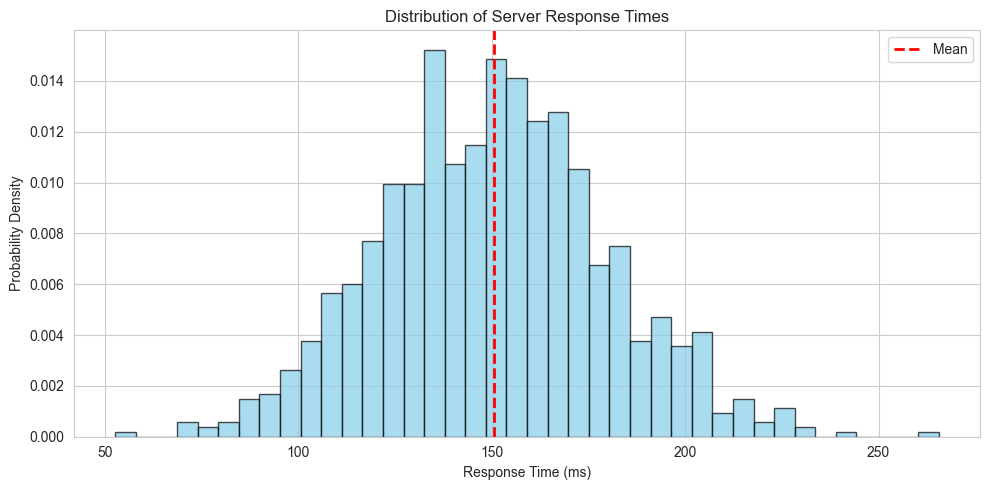

In [ ]:
# ============================================================================
# PART 1: WHAT IS A PROBABILITY DISTRIBUTION?
# ============================================================================




print("\n" + "="*70)
print("PART 1: UNDERSTANDING PROBABILITY DISTRIBUTIONS")
print("="*70)

"""
A probability distribution describes how likely different outcomes are.

Think in terms of your microservices:
- Request latencies follow some pattern
- Most requests complete ~150ms (the peak)
- Few complete in 50ms or 5000ms (the tails)
- This "shape" is the distribution
"""

# Sample: 1000 real server response times
response_times = np.random.normal(loc=150, scale=30, size=1000)

print(f"\nServer Response Times Statistics:")
print(f"  Mean: {response_times.mean():.2f} ms")
print(f"  Std Dev: {response_times.std():.2f} ms")
print(f"  Min: {response_times.min():.2f} ms")
print(f"  Max: {response_times.max():.2f} ms")

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(response_times, bins=40, density=True, alpha=0.7, color='skyblue', edgecolor='black')
ax.set_xlabel('Response Time (ms)')
ax.set_ylabel('Probability Density')
ax.set_title('Distribution of Server Response Times')
ax.axvline(response_times.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(output_dir, '01_response_time_distribution.png'), dpi=100)
print("\n✓ Saved: 01_response_time_distribution.png")
plt.show()


PART 2: NORMAL DISTRIBUTION (GAUSSIAN)

✓ Saved: 02_normal_distribution_properties.png

Empirical Rule (68-95-99.7):
  ±1σ contains 68% of data
  ±2σ contains 95% of data
  ±3σ contains 99.7% of data

Example with response times (μ=150, σ=30):
  68% of requests: 120-180 ms
  95% of requests: 90-210 ms
  99.7% of requests: 60-240 ms


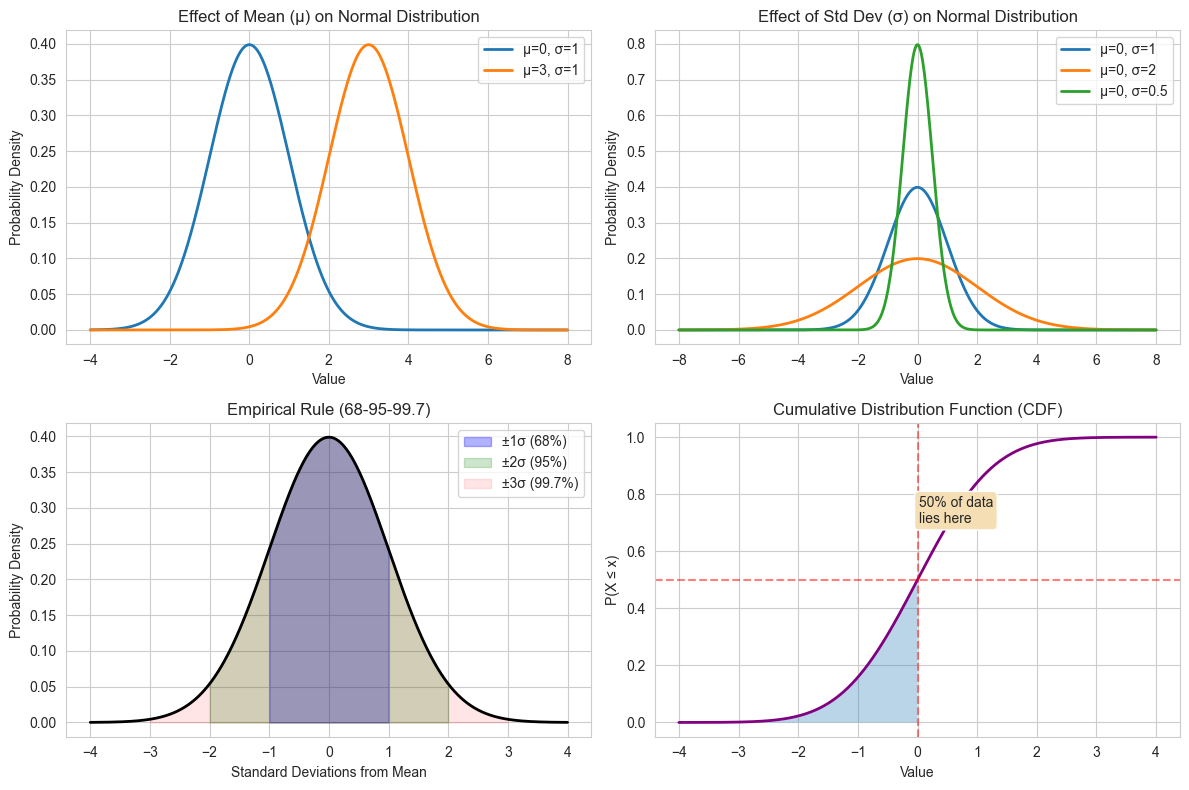

In [7]:
# ============================================================================
# PART 2: THE NORMAL DISTRIBUTION - THE MVP
# ============================================================================

print("\n" + "="*70)
print("PART 2: NORMAL DISTRIBUTION (GAUSSIAN)")
print("="*70)

"""
Why is Normal Distribution the MVP for linear regression?

1. MATHEMATICAL PROPERTY: Bell-shaped, symmetric, defined by 2 parameters
   - Mean (μ): center of distribution
   - Standard Deviation (σ): spread
   
2. CENTRAL LIMIT THEOREM: Average of many independent random variables 
   approaches normal distribution (regardless of original distribution!)
   
3. LINEAR REGRESSION ASSUMPTION: Errors/residuals should be normally distributed
   Why? Because the model assumes: Y = β₀ + β₁X + ε, where ε ~ N(0, σ²)
   
4. PRACTICAL: If residuals aren't normal, your confidence intervals 
   and p-values are wrong!
"""

# Demonstrate properties of normal distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Different means, same std dev
ax = axes[0, 0]
x = np.linspace(-4, 8, 1000)
ax.plot(x, stats.norm.pdf(x, loc=0, scale=1), label='μ=0, σ=1', linewidth=2)
ax.plot(x, stats.norm.pdf(x, loc=3, scale=1), label='μ=3, σ=1', linewidth=2)
ax.set_title('Effect of Mean (μ) on Normal Distribution')
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.legend()

# 2. Same mean, different std dev
ax = axes[0, 1]
x = np.linspace(-8, 8, 1000)
ax.plot(x, stats.norm.pdf(x, loc=0, scale=1), label='μ=0, σ=1', linewidth=2)
ax.plot(x, stats.norm.pdf(x, loc=0, scale=2), label='μ=0, σ=2', linewidth=2)
ax.plot(x, stats.norm.pdf(x, loc=0, scale=0.5), label='μ=0, σ=0.5', linewidth=2)
ax.set_title('Effect of Std Dev (σ) on Normal Distribution')
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.legend()

# 3. The 68-95-99.7 rule (Empirical Rule)
ax = axes[1, 0]
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, loc=0, scale=1)
ax.fill_between(x[(x > -1) & (x < 1)], y[(x > -1) & (x < 1)], alpha=0.3, color='blue', label='±1σ (68%)')
ax.fill_between(x[(x > -2) & (x < 2)], y[(x > -2) & (x < 2)], alpha=0.2, color='green', label='±2σ (95%)')
ax.fill_between(x[(x > -3) & (x < 3)], y[(x > -3) & (x < 3)], alpha=0.1, color='red', label='±3σ (99.7%)')
ax.plot(x, y, 'k-', linewidth=2)
ax.set_title('Empirical Rule (68-95-99.7)')
ax.set_xlabel('Standard Deviations from Mean')
ax.set_ylabel('Probability Density')
ax.legend()

# 4. Cumulative Distribution Function (CDF)
ax = axes[1, 1]
x = np.linspace(-4, 4, 1000)
ax.plot(x, stats.norm.cdf(x), linewidth=2, color='purple')
ax.axhline(0.5, color='red', linestyle='--', alpha=0.5)
ax.axvline(0, color='red', linestyle='--', alpha=0.5)
ax.fill_between(x[x <= 0], stats.norm.cdf(x[x <= 0]), alpha=0.3)
ax.set_title('Cumulative Distribution Function (CDF)')
ax.set_xlabel('Value')
ax.set_ylabel('P(X ≤ x)')
ax.text(0.02, 0.7, '50% of data\nlies here', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat'))

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '02_normal_distribution_properties.png'), dpi=100)
print("\n✓ Saved: 02_normal_distribution_properties.png")

# Practical interpretation
print("\nEmpirical Rule (68-95-99.7):")
print("  ±1σ contains 68% of data")
print("  ±2σ contains 95% of data")
print("  ±3σ contains 99.7% of data")
print("\nExample with response times (μ=150, σ=30):")
print(f"  68% of requests: 120-180 ms")
print(f"  95% of requests: 90-210 ms")
print(f"  99.7% of requests: 60-240 ms")


PART 3: LINEAR REGRESSION MODEL & THE NORMAL RESIDUAL ASSUMPTION

Model: response_time = 49.44 + 2.03 * queue_depth

Residual Statistics:
  Mean: -0.0000 (should be ~0)
  Std Dev: 15.41
  Min: -48.22
  Max: 57.03

✓ Saved: 03_linear_regression_fit.png


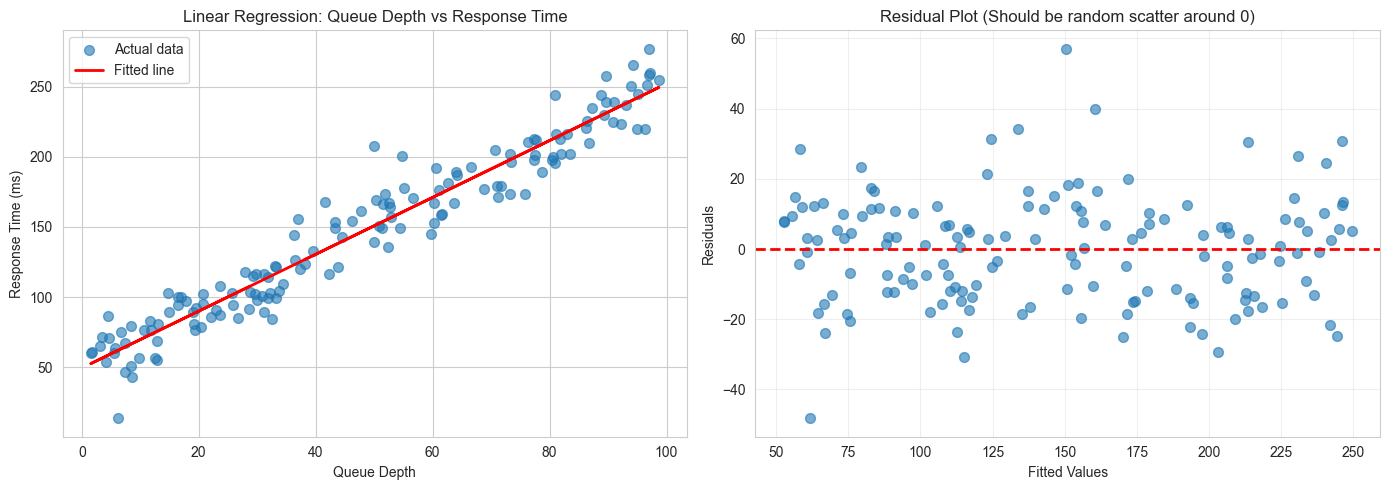

In [8]:
# ============================================================================
# PART 3: LINEAR REGRESSION & ASSUMPTION: NORMAL RESIDUALS
# ============================================================================

print("\n" + "="*70)
print("PART 3: LINEAR REGRESSION MODEL & THE NORMAL RESIDUAL ASSUMPTION")
print("="*70)

"""
Model: Y = β₀ + β₁X + ε

Where:
- Y: response time (dependent variable)
- X: queue depth (independent variable)
- β₀, β₁: parameters we estimate
- ε: error term (assumed to be ~ N(0, σ²))

The ASSUMPTION: Errors should be normally distributed with:
  - Mean = 0 (no systematic bias)
  - Constant variance σ² (homoscedasticity)
  
Why this matters: 
- p-values from t-tests assume normal residuals
- If violated, confidence intervals are wrong
- Predictions lose validity
"""

# Generate synthetic data: queue_depth vs response_time
np.random.seed(42)
queue_depth = np.random.uniform(1, 100, size=150)
# True relationship: response_time = 50 + 2*queue_depth + noise
residual_noise = np.random.normal(0, 15, size=150)  # ← Normal noise!
response_time = 50 + 2 * queue_depth + residual_noise

# Fit linear regression
from sklearn.linear_model import LinearRegression

X = queue_depth.reshape(-1, 1)
y = response_time

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
residuals = y - y_pred

print(f"\nModel: response_time = {model.intercept_:.2f} + {model.coef_[0]:.2f} * queue_depth")
print(f"\nResidual Statistics:")
print(f"  Mean: {residuals.mean():.4f} (should be ~0)")
print(f"  Std Dev: {residuals.std():.2f}")
print(f"  Min: {residuals.min():.2f}")
print(f"  Max: {residuals.max():.2f}")

# Visualize the model fit
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Model fit
ax = axes[0]
ax.scatter(queue_depth, response_time, alpha=0.6, s=50, label='Actual data')
ax.plot(queue_depth, y_pred, 'r-', linewidth=2, label='Fitted line')
ax.set_xlabel('Queue Depth')
ax.set_ylabel('Response Time (ms)')
ax.set_title('Linear Regression: Queue Depth vs Response Time')
ax.legend()

# Residuals
ax = axes[1]
ax.scatter(y_pred, residuals, alpha=0.6, s=50)
ax.axhline(0, color='r', linestyle='--', linewidth=2)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot (Should be random scatter around 0)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '03_linear_regression_fit.png'), dpi=100)
print("\n✓ Saved: 03_linear_regression_fit.png")


PART 4: DIAGNOSING NORMALITY - Q-Q PLOTS & TESTS

Shapiro-Wilk Test p-value: 0.0631
  → Residuals are NORMAL ✓

----------------------------------------------------------------------
WHAT HAPPENS WHEN NORMALITY IS VIOLATED?
----------------------------------------------------------------------

Non-Normal Model:
Shapiro-Wilk Test p-value: 0.0000
  → Residuals are NOT NORMAL ✗


/var/folders/gg/pqnjszb92rg0qx68h0x9g0lr0000gn/T/ipykernel_55571/1818537632.py:153: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/gg/pqnjszb92rg0qx68h0x9g0lr0000gn/T/ipykernel_55571/1818537632.py:154: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(os.path.join(output_dir, '04_qq_plots_normality_tests.png'), dpi=100)



✓ Saved: 04_qq_plots_normality_tests.png


/Users/satishjonnala/Documents/Data Team - AIML/github-repos/ml-notebooks/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


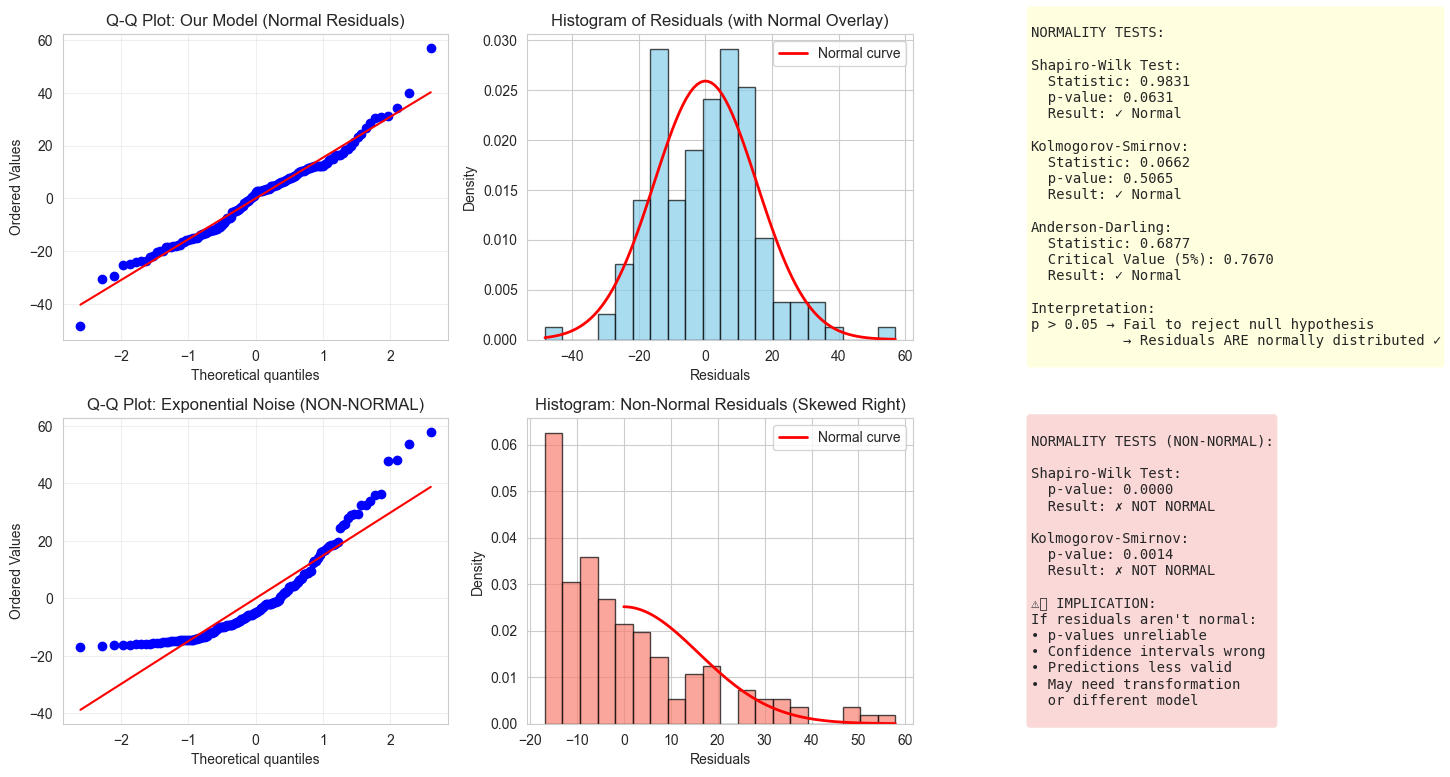

In [5]:
# ============================================================================
# PART 4: CHECKING NORMALITY OF RESIDUALS - THE Q-Q PLOT
# ============================================================================

print("\n" + "="*70)
print("PART 4: DIAGNOSING NORMALITY - Q-Q PLOTS & TESTS")
print("="*70)

"""
Q-Q Plot (Quantile-Quantile Plot): The detective tool for normality

How it works:
1. Sort your residuals (observed quantiles)
2. Compare to theoretical normal distribution quantiles
3. Plot observed vs theoretical
4. If they fall on y=x line → residuals are normal ✓
5. If they deviate → residuals are not normal ✗

Interpretation:
- Straight line at 45° → Normal ✓
- S-shaped curve → Tails are heavier (more outliers than normal)
- Upward curvature → Right-skewed
- Downward curvature → Left-skewed
"""

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# 1. Our model (should be normal - we generated with normal noise)
ax = axes[0, 0]
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('Q-Q Plot: Our Model (Normal Residuals)')
ax.grid(True, alpha=0.3)

# 2. Histogram of residuals
ax = axes[0, 1]
ax.hist(residuals, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
mu, sigma = residuals.mean(), residuals.std()
x = np.linspace(residuals.min(), residuals.max(), 100)
ax.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal curve')
ax.set_xlabel('Residuals')
ax.set_ylabel('Density')
ax.set_title('Histogram of Residuals (with Normal Overlay)')
ax.legend()

# 3. Statistical tests for normality
ax = axes[0, 2]
ax.axis('off')

# Shapiro-Wilk test (best for n < 5000)
shapiro_stat, shapiro_p = shapiro(residuals)

# Anderson-Darling test
anderson_result = stats.anderson(residuals, dist='norm')

# Kolmogorov-Smirnov test
ks_stat, ks_p = stats.kstest(residuals, 'norm', args=(mu, sigma))

test_text = f"""
NORMALITY TESTS:

Shapiro-Wilk Test:
  Statistic: {shapiro_stat:.4f}
  p-value: {shapiro_p:.4f}
  Result: {'✓ Normal' if shapiro_p > 0.05 else '✗ Not Normal'}

Kolmogorov-Smirnov:
  Statistic: {ks_stat:.4f}
  p-value: {ks_p:.4f}
  Result: {'✓ Normal' if ks_p > 0.05 else '✗ Not Normal'}

Anderson-Darling:
  Statistic: {anderson_result.statistic:.4f}
  Critical Value (5%): {anderson_result.critical_values[2]:.4f}
  Result: {'✓ Normal' if anderson_result.statistic < anderson_result.critical_values[2] else '✗ Not Normal'}

Interpretation:
p > 0.05 → Fail to reject null hypothesis
           → Residuals ARE normally distributed ✓
"""

ax.text(0.1, 0.5, test_text, fontsize=10, family='monospace',
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightyellow'))

print(f"\nShapiro-Wilk Test p-value: {shapiro_p:.4f}")
print(f"  → Residuals are {'NORMAL ✓' if shapiro_p > 0.05 else 'NOT NORMAL ✗'}")

# Now show what VIOLATION looks like - Non-normal residuals
print("\n" + "-"*70)
print("WHAT HAPPENS WHEN NORMALITY IS VIOLATED?")
print("-"*70)

# Generate data with non-normal residuals (exponential noise)
exponential_noise = np.random.exponential(scale=15, size=150)
response_time_bad = 50 + 2 * queue_depth + exponential_noise

model_bad = LinearRegression()
model_bad.fit(X, response_time_bad)
y_pred_bad = model_bad.predict(X)
residuals_bad = response_time_bad - y_pred_bad

# 4. Q-Q Plot for non-normal residuals
ax = axes[1, 0]
stats.probplot(residuals_bad, dist="norm", plot=ax)
ax.set_title('Q-Q Plot: Exponential Noise (NON-NORMAL)')
ax.grid(True, alpha=0.3)

# 5. Histogram of non-normal residuals
ax = axes[1, 1]
ax.hist(residuals_bad, bins=20, density=True, alpha=0.7, color='salmon', edgecolor='black')
mu_bad, sigma_bad = residuals_bad.mean(), residuals_bad.std()
x_bad = np.linspace(0, residuals_bad.max(), 100)
ax.plot(x_bad, stats.norm.pdf(x_bad, mu_bad, sigma_bad), 'r-', linewidth=2, label='Normal curve')
ax.set_xlabel('Residuals')
ax.set_ylabel('Density')
ax.set_title('Histogram: Non-Normal Residuals (Skewed Right)')
ax.legend()

# 6. Statistical tests for non-normal residuals
ax = axes[1, 2]
ax.axis('off')

shapiro_stat_bad, shapiro_p_bad = shapiro(residuals_bad)
ks_stat_bad, ks_p_bad = stats.kstest(residuals_bad, 'norm', args=(mu_bad, sigma_bad))
anderson_result_bad = stats.anderson(residuals_bad, dist='norm')

test_text_bad = f"""
NORMALITY TESTS (NON-NORMAL):

Shapiro-Wilk Test:
  p-value: {shapiro_p_bad:.4f}
  Result: {'✓ Normal' if shapiro_p_bad > 0.05 else '✗ NOT NORMAL'}

Kolmogorov-Smirnov:
  p-value: {ks_p_bad:.4f}
  Result: {'✓ Normal' if ks_p_bad > 0.05 else '✗ NOT NORMAL'}

⚠️ IMPLICATION:
If residuals aren't normal:
• p-values unreliable
• Confidence intervals wrong
• Predictions less valid
• May need transformation
  or different model
"""

ax.text(0.1, 0.5, test_text_bad, fontsize=10, family='monospace',
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))

print(f"\nNon-Normal Model:")
print(f"Shapiro-Wilk Test p-value: {shapiro_p_bad:.4f}")
print(f"  → Residuals are {'NORMAL ✓' if shapiro_p_bad > 0.05 else 'NOT NORMAL ✗'}")

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '04_qq_plots_normality_tests.png'), dpi=100)
print("\n✓ Saved: 04_qq_plots_normality_tests.png")

In [ ]:
# ============================================================================
# PART 5: OTHER DISTRIBUTIONS IN ML CONTEXT
# ============================================================================

print("\n" + "="*70)
print("PART 5: OTHER DISTRIBUTIONS YOU'LL ENCOUNTER")
print("="*70)

"""
While Normal is the MVP for linear regression, you'll see others:

1. EXPONENTIAL: Time until next event (service failures, requests)
   - Always positive, right-skewed
   - Used in survival analysis, queue theory
   
2. POISSON: Count of events in fixed time (requests/second, errors/hour)
   - Discrete, right-skewed
   - Used for count regression (GLM)
   
3. BINOMIAL: Number of successes in n trials (pass/fail tests)
   - Discrete, values 0 to n
   - Used for classification
   
4. UNIFORM: All values equally likely
   - Rare in nature, but used for random sampling
   
5. CHI-SQUARE: Sum of squared normal variables
   - Used in hypothesis testing, goodness-of-fit
"""

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# 1. Normal (we know this)
ax = axes[0, 0]
x = np.linspace(-4, 4, 1000)
ax.plot(x, stats.norm.pdf(x), linewidth=2, color='blue')
ax.fill_between(x, stats.norm.pdf(x), alpha=0.3, color='blue')
ax.set_title('Normal Distribution')
ax.set_ylabel('Probability Density')
ax.text(-3.5, 0.3, 'Symmetric\nCenter: μ\nSpread: σ', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat'))

# 2. Exponential
ax = axes[0, 1]
x = np.linspace(0, 5, 1000)
ax.plot(x, stats.expon.pdf(x, scale=1), linewidth=2, color='green')
ax.fill_between(x, stats.expon.pdf(x, scale=1), alpha=0.3, color='green')
ax.set_title('Exponential Distribution')
ax.set_ylabel('Probability Density')
ax.text(2.5, 0.7, 'Right-skewed\nTime until event\nMemoryless', fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgreen'))

# 3. Poisson
ax = axes[0, 2]
x = np.arange(0, 15)
ax.bar(x, stats.poisson.pmf(x, mu=5), color='purple', alpha=0.7, edgecolor='black')
ax.set_title('Poisson Distribution (λ=5)')
ax.set_ylabel('Probability')
ax.set_xlabel('Count')
ax.text(8, 0.15, 'Count data\nDiscrete\nEvents/time', fontsize=9, bbox=dict(boxstyle='round', facecolor='plum'))

# 4. Binomial
ax = axes[1, 0]
n, p = 20, 0.6
x = np.arange(0, n+1)
ax.bar(x, stats.binom.pmf(x, n, p), color='orange', alpha=0.7, edgecolor='black')
ax.set_title(f'Binomial Distribution (n={n}, p={p})')
ax.set_ylabel('Probability')
ax.set_xlabel('Successes')
ax.text(12, 0.15, 'Pass/Fail\nFixed trials\nDensity near np', fontsize=9, bbox=dict(boxstyle='round', facecolor='moccasin'))

# 5. Uniform
ax = axes[1, 1]
x = np.linspace(0, 1, 1000)
ax.fill_between(x, 1, alpha=0.3, color='red')
ax.plot([0, 1], [1, 1], 'r-', linewidth=2)
ax.set_ylim(0, 1.2)
ax.set_title('Uniform Distribution (0, 1)')
ax.set_ylabel('Probability Density')
ax.text(0.5, 0.7, 'Equal probability\nfor all values\nRandom sampling', fontsize=9, bbox=dict(boxstyle='round', facecolor='lightcoral'))

# 6. Chi-Square
ax = axes[1, 2]
x = np.linspace(0, 15, 1000)
for df in [2, 5, 10]:
    ax.plot(x, stats.chi2.pdf(x, df), label=f'df={df}', linewidth=2)
ax.set_title('Chi-Square Distribution')
ax.set_ylabel('Probability Density')
ax.set_xlabel('Value')
ax.legend()
ax.text(8, 0.25, 'Sum of squared\nnormal variables\nHypothesis tests', fontsize=9, bbox=dict(boxstyle='round', facecolor='lightyellow'))

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '05_other_distributions.png'), dpi=100)
print("\n✓ Saved: 05_other_distributions.png")

# Context for each
distributions_info = {
    "Normal": {
        "use_case": "Linear regression residuals, measurement errors",
        "properties": "Symmetric, bell-shaped, defined by μ and σ",
        "ml_context": "Foundation of most regression, t-tests, confidence intervals"
    },
    "Exponential": {
        "use_case": "Time between requests, service failures, queue wait time",
        "properties": "Always positive, right-skewed, memoryless",
        "ml_context": "Survival analysis, reliability modeling"
    },
    "Poisson": {
        "use_case": "Requests/second, errors/hour, bug count",
        "properties": "Discrete counts, right-skewed",
        "ml_context": "Count regression (GLM), rate estimation"
    },
    "Binomial": {
        "use_case": "Pass/fail tests, success rate, classification",
        "properties": "Discrete, n trials, p probability each",
        "ml_context": "Logistic regression foundation, classification"
    },
    "Uniform": {
        "use_case": "Random sampling, initialization, baseline",
        "properties": "All values equally likely",
        "ml_context": "Monte Carlo, random seed, prior distribution"
    }
}

print("\nDistributions in ML Context:")
for dist_name, info in distributions_info.items():
    print(f"\n{dist_name}:")
    print(f"  Use Case: {info['use_case']}")
    print(f"  Properties: {info['properties']}")
    print(f"  ML Context: {info['ml_context']}")

In [ ]:
# ============================================================================
# PART 6: THE PARETO ESSENTIALS - MIND MAP
# ============================================================================

print("\n" + "="*70)
print("PART 6: PARETO ESSENTIALS FOR LINEAR REGRESSION")
print("="*70)

pareto_essentials = """
┌─ PROBABILITY DISTRIBUTIONS FOR LINEAR REGRESSION ─────────────────────┐
│                                                                         │
│  ROOT: Understanding Variation                                         │
│  └─ Every dataset has natural scatter (residuals)                      │
│                                                                         │
│  BRANCH 1: THE ASSUMPTION                                              │
│  ├─ Residuals should be Normally Distributed                           │
│  ├─ Why? Enables p-values, confidence intervals, predictions          │
│  ├─ If violated: all statistical inferences break                      │
│  └─ Check with: Q-Q plots, Shapiro-Wilk test                          │
│                                                                         │
│  BRANCH 2: UNDERSTANDING NORMAL DISTRIBUTION                           │
│  ├─ Shape: Bell curve, symmetric around mean μ                        │
│  ├─ Spread: Controlled by std dev σ                                   │
│  ├─ Empirical Rule: ±1σ=68%, ±2σ=95%, ±3σ=99.7%                     │
│  └─ Practical: Define prediction intervals                            │
│                                                                         │
│  BRANCH 3: DETECTING VIOLATIONS                                        │
│  ├─ Visual: Q-Q plot should follow y=x line                           │
│  ├─ Test: Shapiro-Wilk p-value > 0.05 means normal                    │
│  ├─ Pattern in residuals = assumption violated                        │
│  └─ Action: Transform data or use different model                     │
│                                                                         │
│  BRANCH 4: OTHER DISTRIBUTIONS (CONTEXT)                              │
│  ├─ Exponential: Time between events                                  │
│  ├─ Poisson: Event counts                                             │
│  ├─ Binomial: Success/failure                                         │
│  └─ Not needed for linear regression, but useful in other ML          │
│                                                                         │
│  THE 20% THAT MATTERS:                                                 │
│  ✓ Normal distribution shape & properties                             │
│  ✓ Why linear regression assumes normal residuals                     │
│  ✓ How to check: Q-Q plots and Shapiro-Wilk test                     │
│  ✓ What to do if violated: Transform or choose different model       │
│                                                                         │
└─────────────────────────────────────────────────────────────────────────┘
"""

print(pareto_essentials)

In [ ]:
# ============================================================================
# PART 7: PRACTICAL WORKFLOW - HOW TO USE THIS IN REAL ML
# ============================================================================

print("\n" + "="*70)
print("PART 7: YOUR ML WORKFLOW WITH DISTRIBUTIONS")
print("="*70)

workflow = """
STEP 1: Fit Your Linear Regression Model
  model = LinearRegression()
  model.fit(X_train, y_train)
  residuals = y_actual - y_pred

STEP 2: Check Normality Assumption
  a) Visual inspection (Q-Q Plot)
     stats.probplot(residuals, dist="norm", plot=plt)
  
  b) Statistical test (Shapiro-Wilk)
     stat, p_value = stats.shapiro(residuals)
     if p_value > 0.05:
         print("✓ Residuals are normal")
     else:
         print("✗ Residuals are NOT normal - revisit model")

STEP 3: Interpret Results
  - If normal: Your t-tests, p-values, confidence intervals are valid
  - If not normal: Consider:
    • Log transformation: y' = log(y)
    • Box-Cox transformation: y' = (y^λ - 1)/λ
    • Different model: Use GLM (Poisson, Exponential for count/time data)
    • More features: Add missing explanatory variables
    • Outlier removal: Handle extreme values

STEP 4: Communicate Uncertainty
  Once you've verified normality, you can confidently say:
  "With 95% confidence, response time = 50 ± 5 ms for queue_depth=10"
  (This uses the normal distribution to compute confidence intervals)
"""

print(workflow)


PART 8: FIXING NON-NORMAL RESIDUALS WITH BOX-COX TRANSFORMATION

✓ Saved: 06_box_cox_transformation.png

Box-Cox Transformation Results:
  Optimal λ: 0.7051
  Original model Shapiro-Wilk p: 0.0000 (NOT normal)
  Transformed model Shapiro-Wilk p: 0.0000 (still not perfect)


/var/folders/gg/pqnjszb92rg0qx68h0x9g0lr0000gn/T/ipykernel_55571/774054489.py:59: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/gg/pqnjszb92rg0qx68h0x9g0lr0000gn/T/ipykernel_55571/774054489.py:60: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Arial.
  plt.savefig(os.path.join(output_dir, '06_box_cox_transformation.png'), dpi=100)
/Users/satishjonnala/Documents/Data Team - AIML/github-repos/ml-notebooks/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


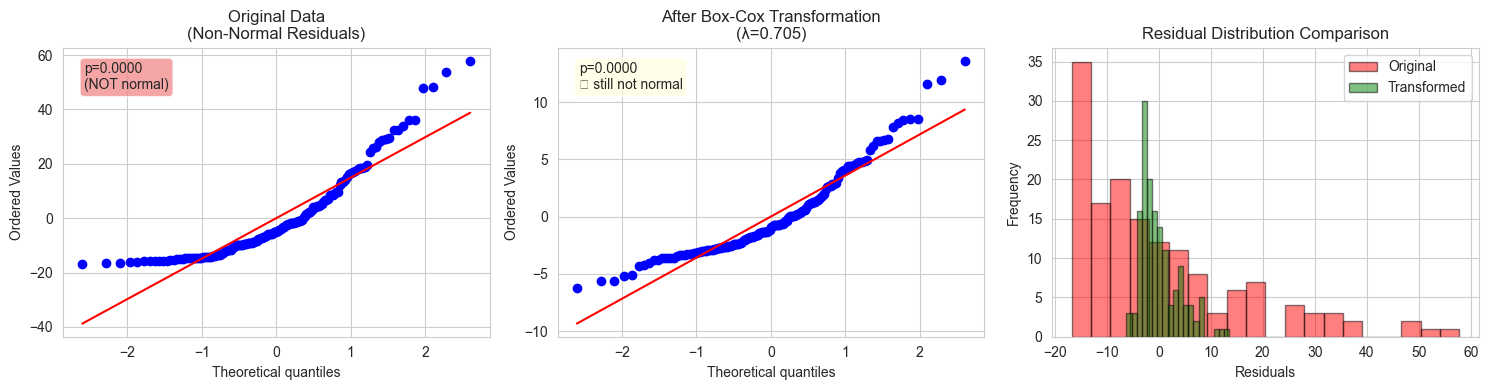

In [6]:
# ============================================================================
# PART 8: TRANSFORMATION EXAMPLE - BOX-COX
# ============================================================================

print("\n" + "="*70)
print("PART 8: FIXING NON-NORMAL RESIDUALS WITH BOX-COX TRANSFORMATION")
print("="*70)

"""
When residuals aren't normal, transformation can help.
Box-Cox finds the optimal λ that makes data most normal.

Formula: y' = (y^λ - 1) / λ    (λ ≠ 0)
         y' = log(y)            (λ = 0)
"""

from scipy.stats import boxcox

# Use our "bad" model with exponential noise
y_transformed, lambda_optimal = boxcox(response_time_bad[response_time_bad > 0])

# Fit model on transformed data
model_transformed = LinearRegression()
model_transformed.fit(X, y_transformed)
y_pred_transformed = model_transformed.predict(X)
residuals_transformed = y_transformed - y_pred_transformed

# Test normality
shapiro_stat_trans, shapiro_p_trans = shapiro(residuals_transformed)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original (non-normal)
ax = axes[0]
stats.probplot(residuals_bad, dist="norm", plot=ax)
ax.set_title('Original Data\n(Non-Normal Residuals)')
shapiro_orig = stats.shapiro(residuals_bad)[1]
ax.text(0.05, 0.95, f'p={shapiro_orig:.4f}\n(NOT normal)', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Transformed (more normal)
ax = axes[1]
stats.probplot(residuals_transformed, dist="norm", plot=ax)
ax.set_title(f'After Box-Cox Transformation\n(λ={lambda_optimal:.3f})')
ax.text(0.05, 0.95, f'p={shapiro_p_trans:.4f}\n{"✓ normal" if shapiro_p_trans > 0.05 else "✗ still not normal"}', 
        transform=ax.transAxes, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightgreen' if shapiro_p_trans > 0.05 else 'lightyellow', alpha=0.7))

# Comparison histogram
ax = axes[2]
ax.hist(residuals_bad, bins=20, alpha=0.5, label='Original', color='red', edgecolor='black')
ax.hist(residuals_transformed, bins=20, alpha=0.5, label='Transformed', color='green', edgecolor='black')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Residual Distribution Comparison')
ax.legend()

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '06_box_cox_transformation.png'), dpi=100)
print("\n✓ Saved: 06_box_cox_transformation.png")

print(f"\nBox-Cox Transformation Results:")
print(f"  Optimal λ: {lambda_optimal:.4f}")
print(f"  Original model Shapiro-Wilk p: {shapiro_orig:.4f} (NOT normal)")
print(f"  Transformed model Shapiro-Wilk p: {shapiro_p_trans:.4f} ({'NORMAL ✓' if shapiro_p_trans > 0.05 else 'still not perfect'})")

In [7]:
# ============================================================================
# PART 9: CHEAT SHEET
# ============================================================================

print("\n" + "="*70)
print("CHEAT SHEET: DISTRIBUTIONS FOR LINEAR REGRESSION")
print("="*70)

cheat_sheet = """
┌─ QUICK REFERENCE ───────────────────────────────────────────────────┐
│                                                                       │
│ NORMAL DISTRIBUTION N(μ, σ²)                                         │
│ └─ Bell-shaped, symmetric                                           │
│    Parameters: μ (mean), σ (std dev)                                │
│    Empirical Rule: ±1σ = 68%, ±2σ = 95%, ±3σ = 99.7%              │
│    PDF: f(x) = (1/(σ√(2π))) * exp(-(x-μ)²/(2σ²))                  │
│                                                                       │
│ KEY PROPERTIES FOR LINEAR REGRESSION                                │
│ ├─ Linear regression assumes residuals ~ N(0, σ²)                  │
│ ├─ If true: p-values, CIs, predictions are valid                   │
│ ├─ If false: Statistical inference breaks                          │
│ └─ Check with Q-Q plots and Shapiro-Wilk test                      │
│                                                                       │
│ CHECKING NORMALITY (CODE)                                           │
│ ├─ Visual: stats.probplot(residuals, plot=plt)                     │
│ ├─ Test: stat, p = stats.shapiro(residuals)                        │
│ │        if p > 0.05: normal ✓                                     │
│ └─ CDF: stats.norm.cdf(x, loc=μ, scale=σ)                          │
│                                                                       │
│ WHEN NOT NORMAL                                                      │
│ ├─ Transform: from scipy.stats import boxcox                        │
│ ├─ Alternative: Use GLM (Generalized Linear Model)                 │
│ ├─ Remove: Outliers affecting the tail                             │
│ └─ Add: Missing features explaining variation                      │
│                                                                       │
│ SCIPY FUNCTIONS                                                      │
│ ├─ stats.norm.pdf(x, loc=μ, scale=σ)        [Density]             │
│ ├─ stats.norm.cdf(x, loc=μ, scale=σ)        [Cumulative]          │
│ ├─ stats.norm.rvs(loc=μ, scale=σ, size=n)   [Random sample]       │
│ ├─ stats.probplot(x, plot=plt)               [Q-Q plot]            │
│ ├─ stats.shapiro(x)                          [Normality test]      │
│ └─ stats.anderson(x, dist='norm')            [Anderson-Darling]    │
│                                                                       │
└───────────────────────────────────────────────────────────────────────┘
"""

print(cheat_sheet)


CHEAT SHEET: DISTRIBUTIONS FOR LINEAR REGRESSION

┌─ QUICK REFERENCE ───────────────────────────────────────────────────┐
│                                                                       │
│ NORMAL DISTRIBUTION N(μ, σ²)                                         │
│ └─ Bell-shaped, symmetric                                           │
│    Parameters: μ (mean), σ (std dev)                                │
│    Empirical Rule: ±1σ = 68%, ±2σ = 95%, ±3σ = 99.7%              │
│    PDF: f(x) = (1/(σ√(2π))) * exp(-(x-μ)²/(2σ²))                  │
│                                                                       │
│ KEY PROPERTIES FOR LINEAR REGRESSION                                │
│ ├─ Linear regression assumes residuals ~ N(0, σ²)                  │
│ ├─ If true: p-values, CIs, predictions are valid                   │
│ ├─ If false: Statistical inference breaks                          │
│ └─ Check with Q-Q plots and Shapiro-Wilk test                      │
│               

In [ ]:
# ============================================================================
# SUMMARY & NEXT STEPS
# ============================================================================

print("\n" + "="*70)
print("SUMMARY: THE 20% THAT MATTERS")
print("="*70)

summary = """
YOU NOW UNDERSTAND:

1. ✓ What probability distributions are (shape of data)
2. ✓ Why Normal is the MVP for linear regression
3. ✓ The assumption: residuals should be N(0, σ²)
4. ✓ How to verify: Q-Q plots and Shapiro-Wilk test
5. ✓ What to do if violated: Transform or alternative model
6. ✓ Other distributions in ML context (Exponential, Poisson, etc.)

PRACTICAL WORKFLOW:
1. Fit linear regression model
2. Extract residuals
3. Create Q-Q plot: if straight line → normal ✓
4. Run Shapiro-Wilk: if p > 0.05 → normal ✓
5. If not normal: Consider transformation or different approach

NEXT DEEP DIVE:
→ Confidence Intervals & Hypothesis Testing
  (How normal distribution enables p-values)
→ Multivariate Distributions
  (Multiple features, covariance matrices)
→ Generalized Linear Models (GLM)
  (When linear + normal isn't appropriate)
"""

print(summary)

print("\n" + "="*70)
print("All visualizations saved to /mnt/user-data/outputs/")
print("="*70)